# Python Notebook For multiple linear regression model for the prediction of demand for shared bikes

## 1. Undestanding the Data

In [43]:
# Import the libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score


# Ignore warning messages
warnings.filterwarnings("ignore")

In [2]:
# Import the data into the python notebook
bikedata=pd.read_csv('day.csv')

In [3]:
# Display the first few rows of the dataset
bikedata.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Basic information about the dataset
bikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
bikedata.shape

(730, 16)

In [6]:
bikedata.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Code to Calculate Percentage of Missing Values in Each Column:

In [8]:
# Calculate the total number of rows in the DataFrame
total_rows = len(bikedata)

# Calculate the percentage of missing values in each column
missing_percentages = (bikedata.isnull().sum() / total_rows) * 100

# Print the percentage of missing values for each column
print(missing_percentages)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64


The output shows that there are no missing values in any of the columns of the DataFrame.

### Unique Values for each Column

In [9]:
# Get unique values for each column in the DataFrame
unique_values_per_column = bikedata.apply(lambda x: x.unique())

# Print the unique values for each column
print(unique_values_per_column)

instant       [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
dteday        [01-01-2018, 02-01-2018, 03-01-2018, 04-01-201...
season                                             [1, 2, 3, 4]
yr                                                       [0, 1]
mnth                    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
holiday                                                  [0, 1]
weekday                                   [6, 0, 1, 2, 3, 4, 5]
workingday                                               [0, 1]
weathersit                                            [2, 1, 3]
temp          [14.110847, 14.902598, 8.050924, 8.2, 9.305237...
atemp         [18.18125, 17.68695, 9.47025, 10.6061, 11.4635...
hum           [80.5833, 69.6087, 43.7273, 59.0435, 43.6957, ...
windspeed     [10.749882, 16.652113, 16.636703, 10.739832, 1...
casual        [331, 131, 120, 108, 82, 88, 148, 68, 54, 41, ...
registered    [654, 670, 1229, 1454, 1518, 1362, 891, 768, 1...
cnt           [985, 801, 1349, 1562, 160

### Dropping Values that are not required for the target Variable

In [11]:
# Drop 'instant' and dteday column as 'instant' does not serve any purpose and dteday column vital informations have been extracted
bikedata.drop(['instant'],axis=1,inplace=True)
bikedata.drop(['dteday'],axis=1,inplace=True)

### Replacing Numerical Values with Meaningfull Values

In [12]:
# Replace season binary numbers with meaningful categories and change dtype to object
# Season: 1 -> 'spring', 2 -> 'summer', 3 -> 'fall', 4 -> 'winter'
bikedata['season'].replace({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}, inplace=True)

In [13]:
# Replace year binary numbers with meaningful categories and change dtype to object
# Year: 0 -> '2018', 1 -> '2019'
bikedata['yr'].replace({0: '2018', 1: '2019'}, inplace=True)


In [14]:
# Replace month numbers with meaningful categories and change dtype to object
# Month: 1 -> 'Jan', 2 -> 'Feb', ..., 12 -> 'Dec'
bikedata['mnth'].replace({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'June', 7: 'July', 8: 'Aug', 
                          9: 'Sept', 10: 'Oct', 11: 'Nov', 12: 'Dec'}, inplace=True)


In [15]:
# Replace weekday numbers with meaningful categories and change dtype to object
# Weekday: 0 -> 'Mon', 1 -> 'Tue', 2 -> 'Wed', 3 -> 'Thurs', 4 -> 'Fri', 5 -> 'Sat', 6 -> 'Sun'
bikedata['weekday'].replace({0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thurs', 4: 'Fri', 5: 'Sat', 6: 'Sun'}, inplace=True)


In [16]:
# Replace weathersit numbers with meaningful categories and change dtype to object
# Weather situation: 1 -> 'Clear', 2 -> 'Cloudy', 3 -> 'Light Rain', 4 -> 'Heavy Rain'
bikedata['weathersit'].replace({1: 'Clear', 2: 'Cloudy', 3: 'Light Rain', 4: 'Heavy Rain'}, inplace=True)

In [17]:
# Replace workingday binary numbers with meaningful categories and change dtype to object
# Workingday: 0 -> 'workingday', 1 -> 'Holiday_w'
bikedata['workingday'].replace({0: 'workingday', 1: 'Holiday_w'}, inplace=True)


In [18]:
# Replace holiday binary numbers with meaningful categories and change dtype to object
# Holiday: 0 -> 'No Holiday', 1 -> 'Holiday'
bikedata['holiday'].replace({0: 'No Holiday', 1: 'Holiday'}, inplace=True)


## 2. Exploratory Data Analysis

### Box Plots of Categorical Variables against 'cnt':

#### Box Plots 1 to 4:

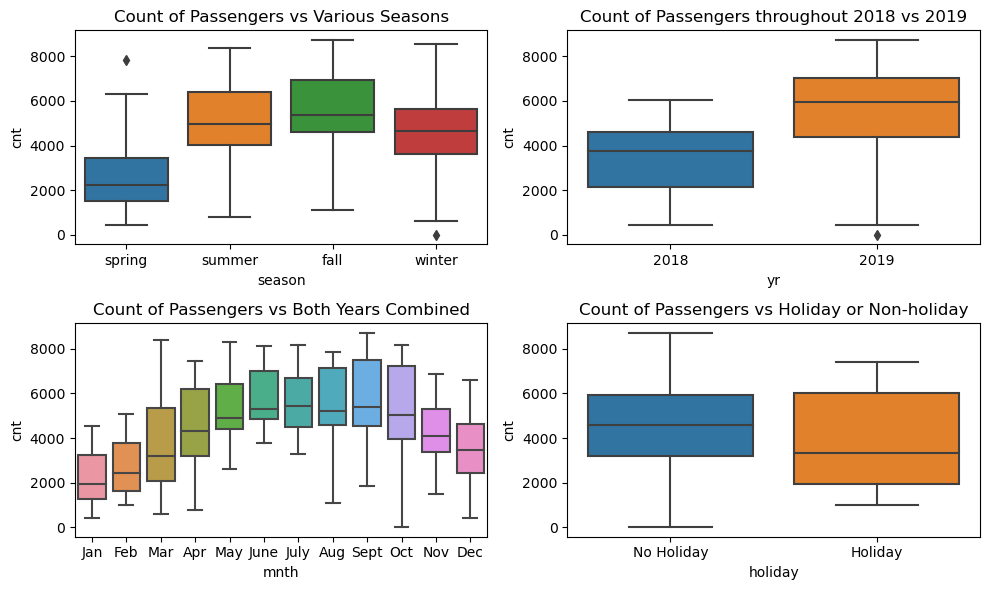

In [19]:
# Set the figure size for the plot
plt.figure(figsize=(10, 6))

# Box Plot 1: Count of Passengers vs Various Seasons
plt.subplot(2, 2, 1)
sns.boxplot(x='season', y='cnt', data=bikedata)
plt.title('Count of Passengers vs Various Seasons')

# Box Plot 2: Count of Passengers throughout 2018 vs 2019
plt.subplot(2, 2, 2)
sns.boxplot(x='yr', y='cnt', data=bikedata)
plt.title('Count of Passengers throughout 2018 vs 2019')

# Box Plot 3: Count of Passengers vs Both Years Combined
plt.subplot(2, 2, 3)
sns.boxplot(x='mnth', y='cnt', data=bikedata)
plt.title('Count of Passengers vs Both Years Combined')

# Box Plot 4: Count of Passengers vs Holiday or Non-holiday
plt.subplot(2, 2, 4)
sns.boxplot(x='holiday', y='cnt', data=bikedata)
plt.title('Count of Passengers vs Holiday or Non-holiday')

# Adjust the layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()



#### Box Plots 5 to 7:

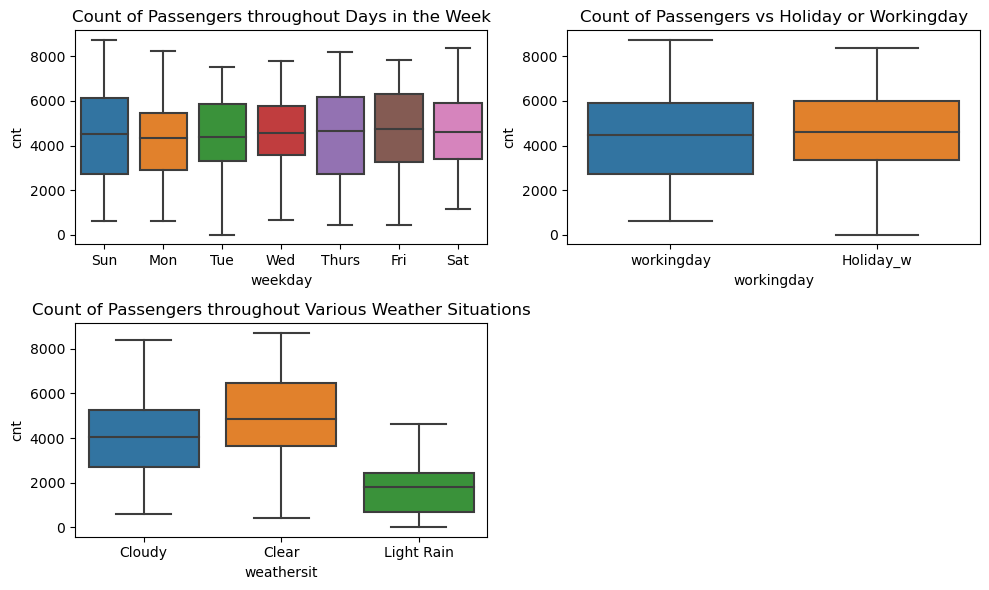

In [21]:
# Set the figure size for the plot
plt.figure(figsize=(10, 6))

# Box Plot 5: Count of Passengers throughout Days in the Week
plt.subplot(2, 2, 1)
sns.boxplot(x='weekday', y='cnt', data=bikedata)
plt.title('Count of Passengers throughout Days in the Week')

# Box Plot 6: Count of Passengers vs Holiday or Workingday
plt.subplot(2, 2, 2)
sns.boxplot(x='workingday', y='cnt', data=bikedata)
plt.title('Count of Passengers vs Holiday or Workingday')

# Box Plot 7: Count of Passengers throughout Various Weather Situations
plt.subplot(2, 2, 3)
sns.boxplot(x='weathersit', y='cnt', data=bikedata)
plt.title('Count of Passengers throughout Various Weather Situations')

# Adjust the layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

### Scatter Plots: Numerical Variables vs Count of Passengers (cnt)


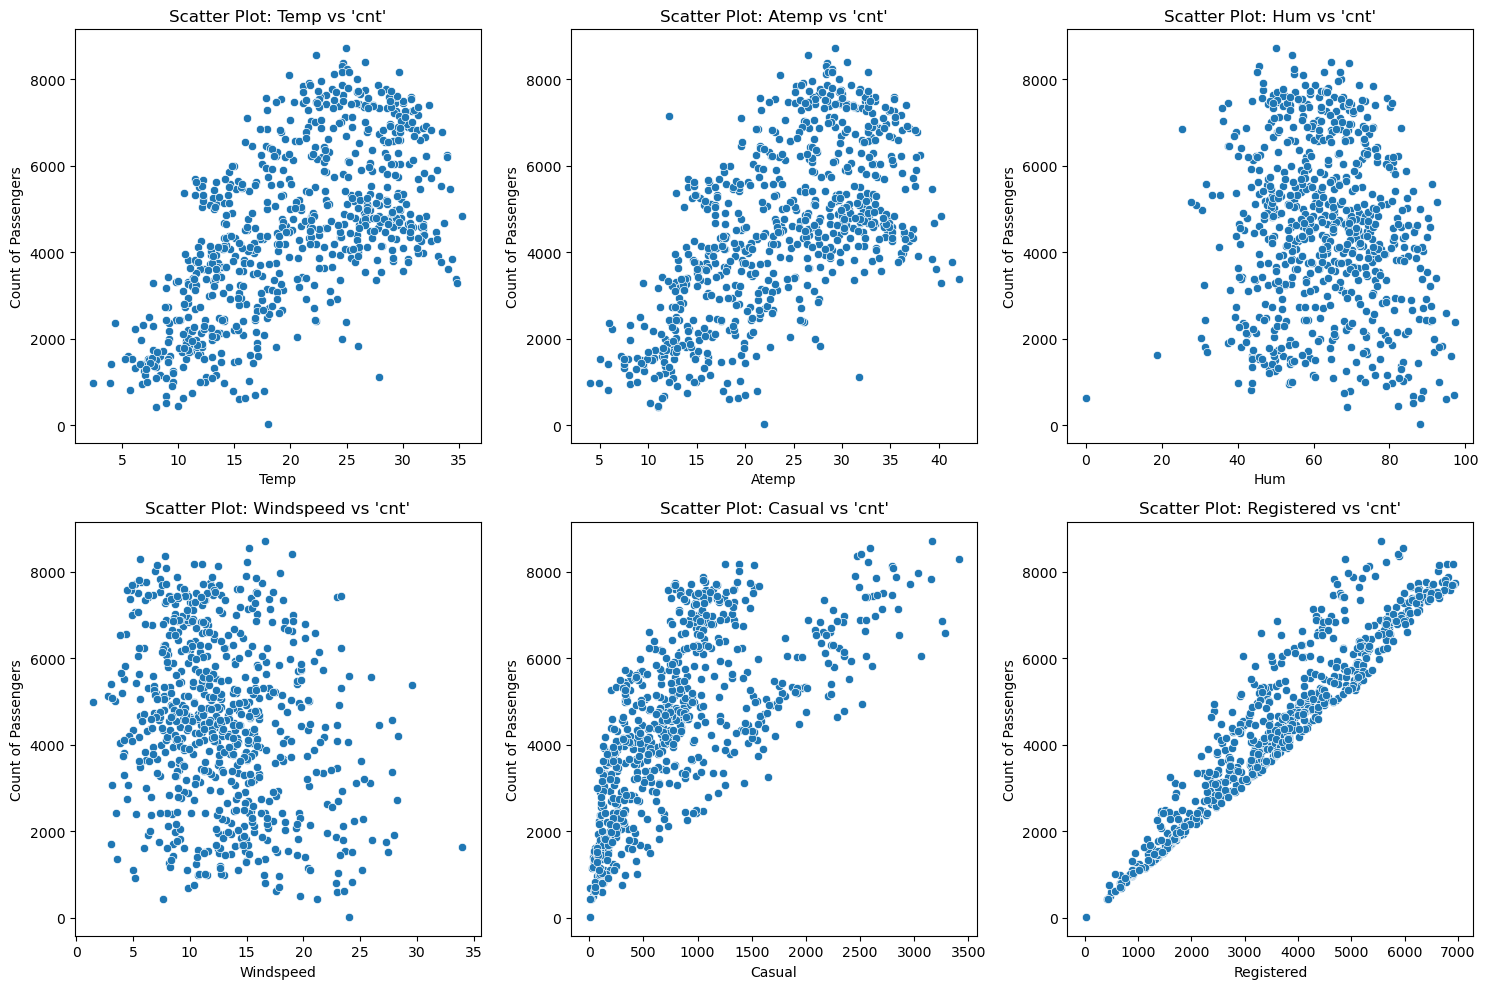

In [22]:
# Selecting the numerical variables for the x-axis
numerical_columns_x = ["temp", "atemp", "hum", 'windspeed', 'casual', 'registered']

# Set the figure size for the plot
plt.figure(figsize=(15, 10))

# Loop through each numerical variable and create individual scatter plots against 'cnt'
for i, col in enumerate(numerical_columns_x, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=col, y='cnt', data=bikedata)
    plt.title(f"Scatter Plot: {col.capitalize()} vs 'cnt'")
    plt.xlabel(col.capitalize())
    plt.ylabel('Count of Passengers')

# Adjust the layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

### Correlation Heatmap of Numerical Columns

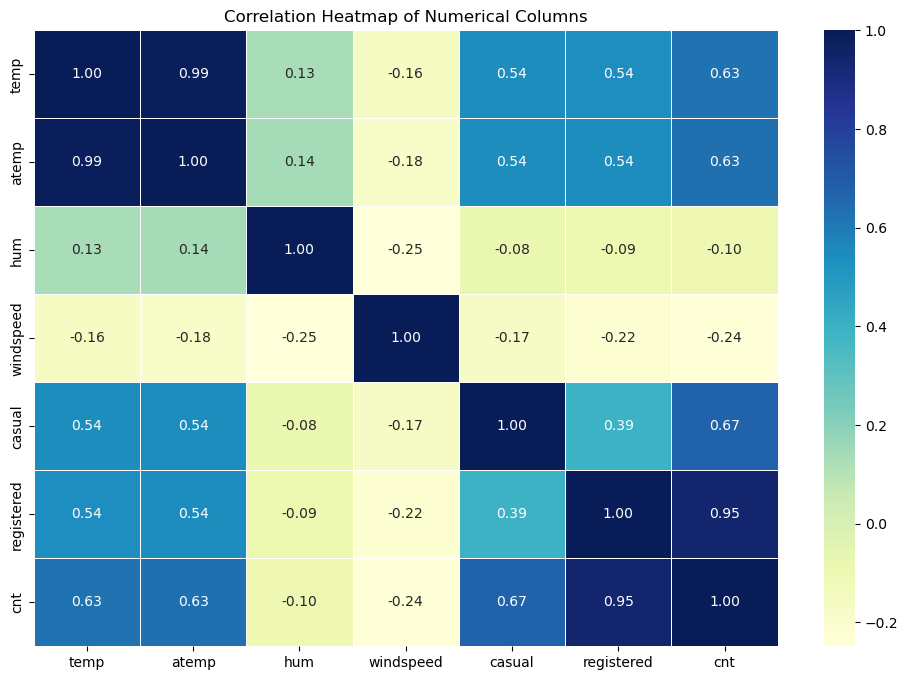

In [23]:
# Creating a Heatmap of Numerical Variables against Each Other to See Their Correlations

# Set the figure size for the plot
plt.figure(figsize=(12, 8))

# Calculate the correlation matrix for numerical columns
correlation_matrix = bikedata.corr()

# Using Seaborn's heatmap function to plot the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5)

# Adding a title to the plot
plt.title("Correlation Heatmap of Numerical Columns")

# Show the plot
plt.show()

## 3. Data Preparation

### Convert Categorical Data into Dummy Variables and Scale Numeric Variables

In [24]:
# Create a new DataFrame to store dummy variables
status = pd.get_dummies(bikedata[['season', 'yr', 'holiday', 'mnth', 'workingday', 'weekday', 'weathersit']], drop_first=True)

In [28]:
status.head()

,season_spring,season_summer,season_winter,yr_2019,holiday_No Holiday,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,...,mnth_Sept,workingday_workingday,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Light Rain
0,1,0,0,0,1,0,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0
1,1,0,0,0,1,0,0,0,1,0,...,0,1,1,0,0,0,0,0,1,0
2,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [25]:
# Join original data and the dummy variable DataFrame 'status'
final = pd.concat([bikedata, status], axis=1)

In [29]:
final.head()

,temp,atemp,hum,windspeed,casual,registered,cnt,season_spring,season_summer,season_winter,...,mnth_Sept,workingday_workingday,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Light Rain
0,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0,...,0,1,0,0,1,0,0,0,1,0
1,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0,...,0,1,1,0,0,0,0,0,1,0
2,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [26]:
# Drop the individual columns whose dummy variables have been created
final = final.drop(['season', 'yr', 'holiday', 'mnth', 'workingday', 'weekday', 'weathersit'], axis=1)

In [30]:
final.head()

,temp,atemp,hum,windspeed,casual,registered,cnt,season_spring,season_summer,season_winter,...,mnth_Sept,workingday_workingday,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Light Rain
0,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0,...,0,1,0,0,1,0,0,0,1,0
1,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0,...,0,1,1,0,0,0,0,0,1,0
2,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0,...,0,0,0,0,0,1,0,0,0,0


#### Train-Test Split and Scaling

In [31]:
# Create df_train and df_test splits from the DataFrame and check their shape
df_train, df_test = train_test_split(final, train_size=0.7, random_state=100)

In [33]:
df_train.head()

,temp,atemp,hum,windspeed,casual,registered,cnt,season_spring,season_summer,season_winter,...,mnth_Sept,workingday_workingday,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Light Rain
576,29.246653,33.1448,70.4167,11.083475,968,6248,7216,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,16.980847,20.6746,62.1250,10.792293,956,3110,4066,1,0,0,...,0,1,0,0,1,0,0,0,1,0
728,10.489153,11.5850,48.3333,23.500518,364,1432,1796,1,0,0,...,0,1,1,0,0,0,0,0,0,0
482,15.443347,18.8752,48.9583,8.708325,1120,3100,4220,0,1,0,...,0,1,0,0,1,0,0,0,1,0
111,13.803347,16.0977,72.9583,14.707907,177,1506,1683,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [34]:
df_test.head()

,temp,atemp,hum,windspeed,casual,registered,cnt,season_spring,season_summer,season_winter,...,mnth_Sept,workingday_workingday,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Light Rain
184,29.793347,33.27085,63.7917,5.459106,3065,2978,6043,0,0,0,...,0,1,0,0,0,0,1,0,1,0
535,32.082500,36.04875,59.2083,7.625404,872,5339,6211,0,1,0,...,0,0,0,0,0,1,0,0,0,0
299,19.270000,22.85230,81.2917,13.250121,240,2419,2659,0,0,1,...,0,0,0,0,0,0,0,0,1,0
221,31.433347,34.24915,42.4167,13.417286,884,3896,4780,0,0,0,...,0,0,0,0,0,1,0,0,0,0
152,29.315000,32.19710,30.5000,19.583229,736,4232,4968,0,1,0,...,0,0,0,0,0,0,0,0,0,0


#### Scaling Numeric Variables

In [35]:
# Create an object to be scaled
scaler = MinMaxScaler()

In [36]:
# Make a list of variables to be scaled
var_scale = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

In [37]:
# Scale all the numeric variables between 0 and 1
df_train[var_scale] = scaler.fit_transform(df_train[var_scale])

### Correlation Heatmap after Data Preparation

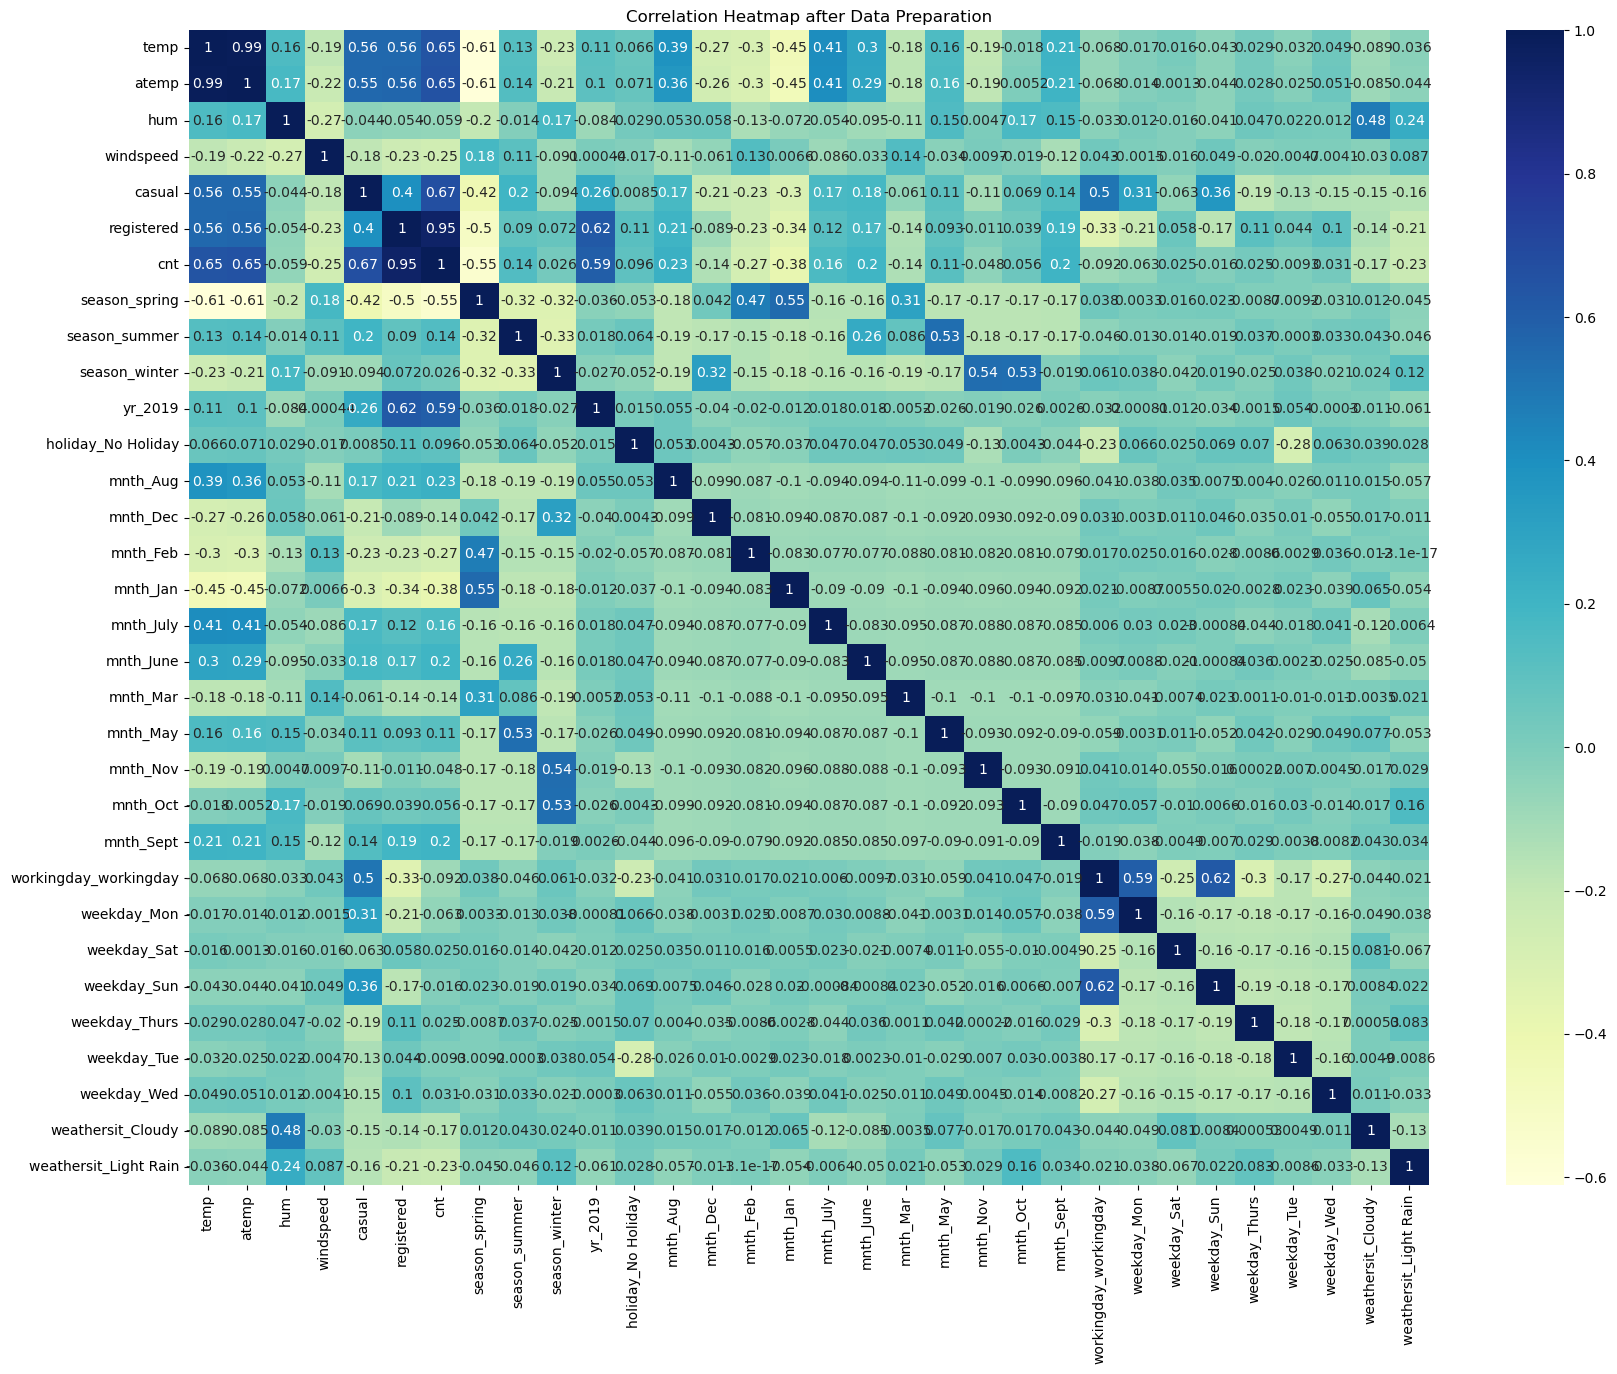

In [41]:


plt.figure(figsize=(20, 15))  # Increase the figure size for better readability
correlation_matrix = df_train.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu')
plt.title("Correlation Heatmap after Data Preparation")
plt.show()


In [54]:

# Create a DataFrame from the correlation matrix
df_corr = pd.DataFrame(correlation_matrix)

# Create the heatmap trace
heatmap_trace = go.Heatmap(z=df_corr.values,
                           x=df_corr.columns,
                           y=df_corr.columns,
                           colorscale='RdBu',
                           zmin=-1, zmax=1)

# Create the layout
layout = go.Layout(title="Correlation Heatmap after Data Preparation",
                   xaxis_title="Features",
                   yaxis_title="Features",
                   width=1000,  # Adjust the width of the plot as needed
                   height=800)  # Adjust the height of the plot as needed

# Create the figure and add the heatmap trace
fig = go.Figure(data=heatmap_trace, layout=layout)

# Show the plot
fig.show()

## 4. Training Data

In [55]:
# Split df_train further into X_train and y_train
y_train = df_train.pop('cnt')
X_train = df_train

In [56]:
# Add a constant term to the training data (for intercept in the regression)
X_train_with_const = sm.add_constant(X_train)

# Create a linear regression model and fit it to the training data
model = sm.OLS(y_train, X_train_with_const).fit()

# Get the parameters (coefficients) of the model
coefficients = model.params

# Print the model summary to view the detailed statistics
model_summary = model.summary()

# Display the results
print("Coefficients:")
print(coefficients)
print("\nModel Summary:")
print(model_summary)

Coefficients:
const                    2.775558e-17
temp                     4.440892e-16
atemp                   -5.551115e-17
hum                     -5.551115e-16
windspeed               -2.914335e-16
casual                   3.774735e-01
registered               7.968247e-01
season_spring            8.951173e-16
season_summer           -2.359224e-16
season_winter            4.996004e-16
yr_2019                  1.977585e-16
holiday_No Holiday      -1.908196e-16
mnth_Aug                -4.024558e-16
mnth_Dec                -1.127570e-16
mnth_Feb                -4.683753e-16
mnth_Jan                -4.510281e-17
mnth_July               -6.106227e-16
mnth_June               -5.481726e-16
mnth_Mar                -4.206704e-16
mnth_May                -2.359224e-16
mnth_Nov                -3.755676e-16
mnth_Oct                -6.245005e-16
mnth_Sept               -3.469447e-16
workingday_workingday   -3.885781e-16
weekday_Mon              6.522560e-16
weekday_Sat              1.769418e-1

In [57]:
# Create an empty DataFrame to store VIF values for each feature
vif_df = pd.DataFrame()

# Set the features (independent variables) for which we want to calculate VIF
X_features = X_train

# Add the column names of the features to the DataFrame
vif_df['Features'] = X_features.columns

# Calculate the VIF for each feature and store it in the DataFrame
vif_df['VIF'] = [variance_inflation_factor(X_features.values, i) for i in range(X_features.shape[1])]

# Round the VIF values to two decimal places for better readability
vif_df['VIF'] = round(vif_df['VIF'], 2)

# Sort the DataFrame in descending order based on VIF values to identify multicollinearity
vif_df = vif_df.sort_values(by="VIF", ascending=False)

# Display the DataFrame containing feature names and their corresponding VIF values
vif_df


,Features,VIF
10,holiday_No Holiday,145.87
0,temp,68.41
22,workingday_workingday,60.00
1,atemp,56.19
25,weekday_Sun,35.11
23,weekday_Mon,33.11
6,season_spring,10.84
8,season_winter,9.95
7,season_summer,8.40
5,registered,7.74


### Dropping Features

In [58]:
# List of features to drop
features_to_drop = ['atemp', 'holiday_No Holiday', 'workingday_workingday', 'registered', 'hum', 'season_spring',
                    'casual', 'mnth_July', 'mnth_Oct', 'weekday_Sun', 'weekday_Sat', 'weekday_Mon', 'mnth_Mar',
                    'mnth_May', 'mnth_June', 'mnth_Feb', 'weekday_Thurs', 'mnth_Nov', 'mnth_Dec', 'weekday_Tue',
                    'mnth_Jan', 'mnth_Aug', 'weekday_Wed']

# Drop the specified features from your DataFrame
X_train_dropped = X_train.drop(features_to_drop, axis=1)

# Now X_train_dropped contains the updated DataFrame without the dropped features.

### Fitting the Model After Dropping Features


In [60]:
# Add a constant term to the training data (for intercept in the regression)
X_train_with_const = sm.add_constant(X_train_dropped)

# Create a linear regression model and fit it to the training data
model_after_dropping = sm.OLS(y_train, X_train_with_const).fit()

# Get the model summary to view the detailed statistics
model_summary_after_dropping = model_after_dropping.summary()

# Display the results
print("Model Summary After Dropping Features:")
print(model_summary_after_dropping)

Model Summary After Dropping Features:
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     296.5
Date:                Mon, 24 Jul 2023   Prob (F-statistic):          1.53e-184
Time:                        21:59:06   Log-Likelihood:                 484.24
No. Observations:                 510   AIC:                            -950.5
Df Residuals:                     501   BIC:                            -912.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

### Calculating Variance Inflation Factor (VIF) for Remaining Features

In [61]:
# Create an empty DataFrame to store VIF values for each feature
vif_df = pd.DataFrame()

# Set the features (independent variables) for which we want to calculate VIF
X_features = X_train_dropped  

# Add the column names of the features to the DataFrame
vif_df['Features'] = X_features.columns

# Calculate the VIF for each feature and store it in the DataFrame
vif_df['VIF'] = [variance_inflation_factor(X_features.values, i) for i in range(X_features.shape[1])]

# Round the VIF values to two decimal places for better readability
vif_df['VIF'] = round(vif_df['VIF'], 2)

# Sort the DataFrame in descending order based on VIF values to identify multicollinearity
vif_df = vif_df.sort_values(by="VIF", ascending=False)

# Display the DataFrame containing feature names and their corresponding VIF values
print("Variance Inflation Factor (VIF) for Remaining Features:")
print(vif_df)

Variance Inflation Factor (VIF) for Remaining Features:
                Features   VIF
0                   temp  3.68
1              windspeed  3.03
4                yr_2019  2.00
2          season_summer  1.57
6      weathersit_Cloudy  1.48
3          season_winter  1.37
5              mnth_Sept  1.20
7  weathersit_Light Rain  1.08


#### Analysis of the Final Model

**Coefficients:**
- temp: The temperature has a positive coefficient of 0.5527, indicating that as the temperature increases, the bike rentals tend to increase.
- windspeed: The windspeed has a negative coefficient of -0.1552, suggesting that higher windspeeds are associated with a decrease in bike rentals.
- season_summer: Being in the summer season has a positive coefficient of 0.0894, indicating that bike rentals are higher in summer compared to the reference season.
- season_winter: Being in the winter season has a positive coefficient of 0.1281, suggesting that bike rentals are higher in winter compared to the reference season.
- yr_2019: The year 2019 has a positive coefficient of 0.2332, indicating that bike rentals increased in 2019 compared to the reference year.
- mnth_Sept: Being in September has a positive coefficient of 0.0978, suggesting higher bike rentals during this month compared to the reference month.
- weathersit_Cloudy: A cloudy weather condition has a negative coefficient of -0.0767, indicating that bike rentals tend to decrease when the weather is cloudy.
- weathersit_Light Rain: Light rain weather condition has a negative coefficient of -0.2785, suggesting a significant decrease in bike rentals during light rain.

## 5.Residual Analysis

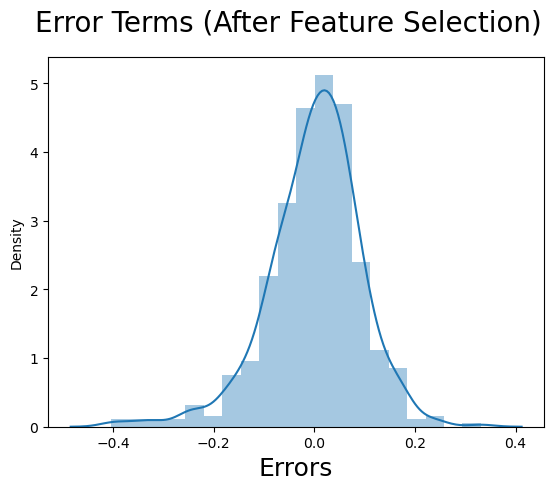

In [64]:
# Step 1: Make predictions for the target variable (cnt) using our new model (model_after_dropping) on the training data (X_train_with_const) with the constant term.
y_train_pred_after_dropping = model_after_dropping.predict(X_train_with_const)

# Step 2: Calculate the residuals by subtracting the predicted values from the actual target values (y_train - y_train_pred_after_dropping).
residuals_after_dropping = y_train - y_train_pred_after_dropping

# Step 3: Plot the distribution of errors (residuals) to check for normality.
fig = plt.figure()
sns.distplot(residuals_after_dropping, bins=20)
fig.suptitle('Error Terms (After Feature Selection)', fontsize=20)
plt.xlabel('Errors', fontsize=18)
plt.show()


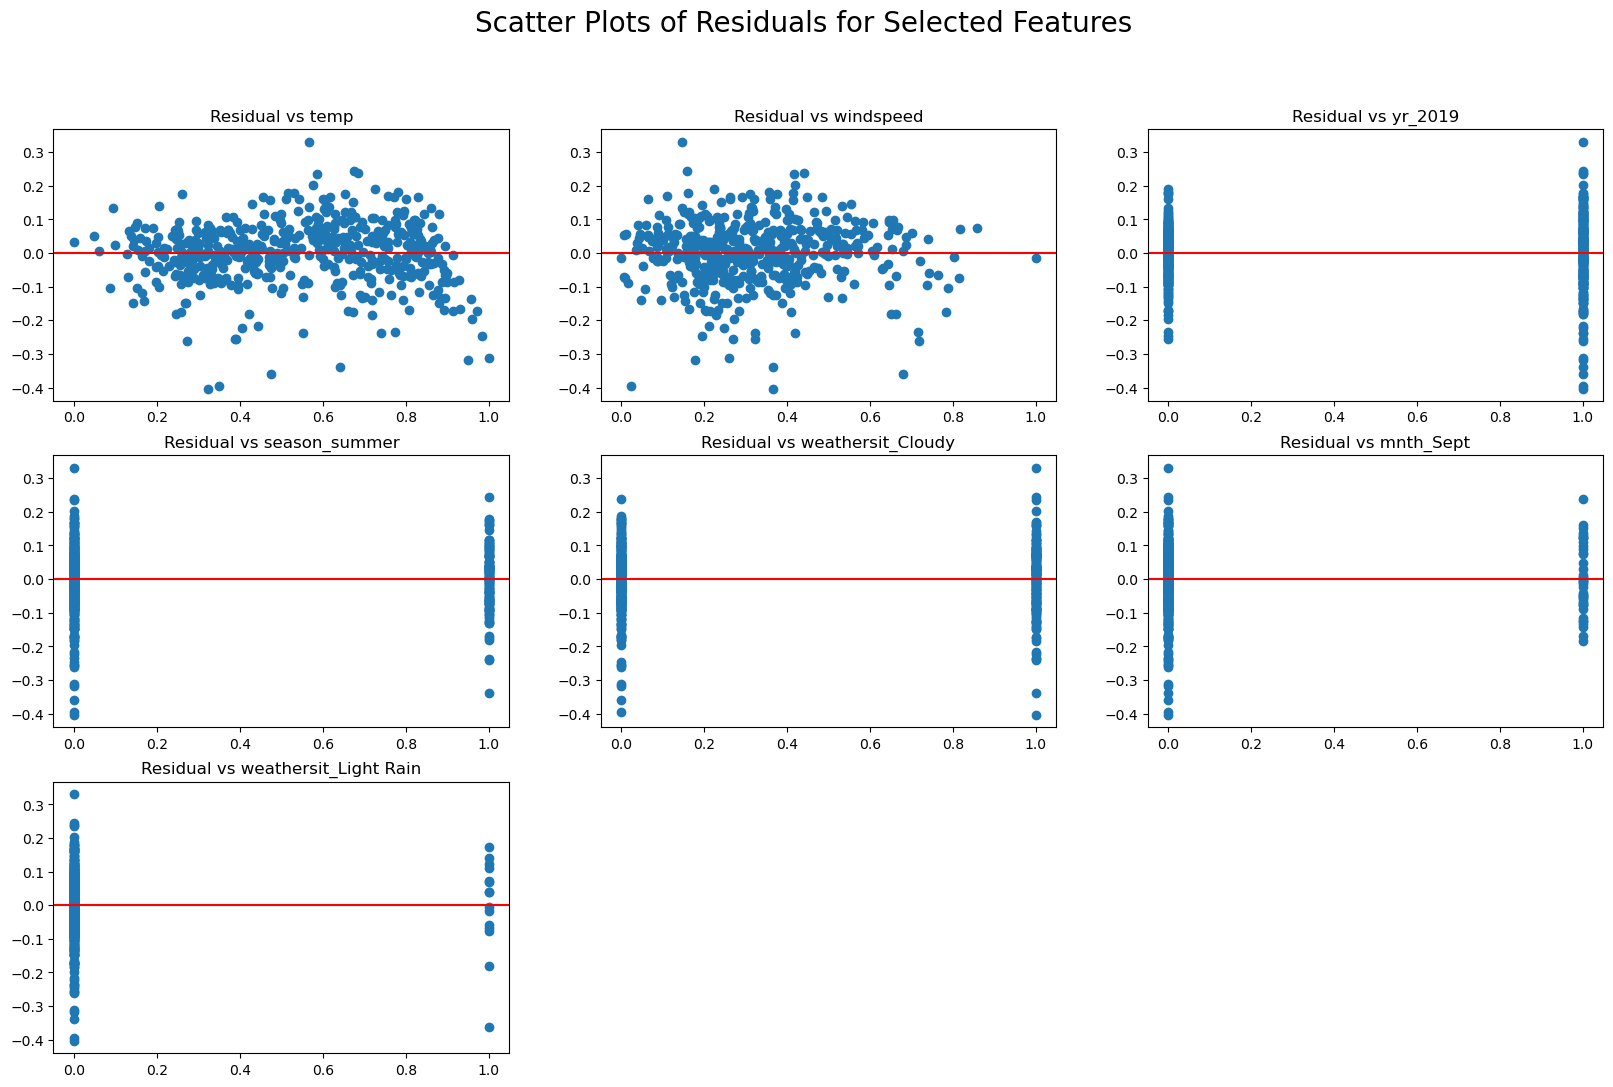

In [66]:
# Create a list of feature names for which we want to plot the residuals
feature_names = ['temp', 'windspeed', 'yr_2019', 'season_summer', 'weathersit_Cloudy', 'mnth_Sept', 'weathersit_Light Rain']

# Create a 3x3 grid of subplots for the scatter plots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 12))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Loop through the feature names and plot the residuals for each feature
for i, feature in enumerate(feature_names):
    axes[i].scatter(X_train[feature], residuals_after_dropping)  # Scatter plot of feature vs. residuals
    axes[i].set_title(f"Residual vs {feature}")  # Set the title for each subplot
    axes[i].axhline(y=0, color='r', linestyle='-')  # Add a red horizontal line at y=0 (centered at 0)
    
# Hide any empty subplots
for j in range(len(feature_names), len(axes)):
    axes[j].axis('off')

# Add a main title for the entire figure
fig.suptitle("Scatter Plots of Residuals for Selected Features", fontsize=20)

# Display the plot
plt.show()

## 6. Prediction on Final Model

In [67]:
# Create a new DataFrame to store the scaled values
df_test_scaled = df_test.copy()

# List of numerical variables to be scaled
num_vars = ['temp', 'atemp', 'hum', 'casual', 'registered', 'windspeed', 'cnt']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply MinMax scaling to the selected numerical variables
df_test_scaled[num_vars] = scaler.fit_transform(df_test[num_vars])

# Display the scaled DataFrame
print("Scaled DataFrame:")
print(df_test_scaled)

Scaled DataFrame:
         temp     atemp       hum  windspeed    casual  registered       cnt  \
184  0.837241  0.778767  0.534223   0.149393  0.898559    0.397068  0.704300   
535  0.911423  0.855132  0.470417   0.231142  0.253749    0.765284  0.725421   
299  0.496221  0.492359  0.777843   0.443398  0.067921    0.309888  0.278853   
221  0.890387  0.805661  0.236659   0.449707  0.257277    0.540237  0.545512   
152  0.821739  0.749249  0.070765   0.682387  0.213761    0.592639  0.569148   
..        ...       ...       ...        ...       ...         ...       ...   
702  0.503971  0.508864  0.667633   0.383644  0.159365    0.876949  0.775082   
127  0.573725  0.577423  0.525522   0.132095  0.409291    0.389894  0.489314   
640  0.745342  0.687659  0.751160   0.111637  0.211408    1.000000  0.896530   
72   0.303855  0.320482  0.337991   0.289582  0.102911    0.195727  0.201785   
653  0.494006  0.497582  0.423433   0.404103  0.268450    0.963818  0.891753   

     season_spring  s

In [68]:
df_test_scaled.head()

,temp,atemp,hum,windspeed,casual,registered,cnt,season_spring,season_summer,season_winter,...,mnth_Sept,workingday_workingday,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Light Rain
184,0.837241,0.778767,0.534223,0.149393,0.898559,0.397068,0.704300,0,0,0,...,0,1,0,0,0,0,1,0,1,0
535,0.911423,0.855132,0.470417,0.231142,0.253749,0.765284,0.725421,0,1,0,...,0,0,0,0,0,1,0,0,0,0
299,0.496221,0.492359,0.777843,0.443398,0.067921,0.309888,0.278853,0,0,1,...,0,0,0,0,0,0,0,0,1,0
221,0.890387,0.805661,0.236659,0.449707,0.257277,0.540237,0.545512,0,0,0,...,0,0,0,0,0,1,0,0,0,0
152,0.821739,0.749249,0.070765,0.682387,0.213761,0.592639,0.569148,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### Dividing the test set into x_test and y_test


In [69]:
y_test = df_test_scaled.pop('cnt')
X_test = df_test_scaled

In [70]:
# Add a constant term to the test data (for intercept in the regression)
X_test_with_const = sm.add_constant(X_test)

In [71]:
# List of features to drop from the test data
# Here, we drop the same features that were dropped from the training data to ensure consistency
features_to_drop_test = ['atemp', 'hum', 'casual', 'registered', 'holiday_No Holiday', 'workingday_workingday',
                        'season_spring', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_July', 'mnth_June',
                        'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun',
                        'weekday_Thurs', 'weekday_Tue', 'weekday_Wed']



In [72]:
# Drop the specified features from the test data
X_test_dropped = X_test_with_const.drop(features_to_drop_test, axis=1)

In [73]:
# Make predictions on the test data using the final trained model 'model_after_dropping'
y_pred_final_model = model_after_dropping.predict(X_test_dropped)

In [75]:
# Assuming 'y_test' contains the true target values for the test data
# Calculate the R-squared value to evaluate the model's performance on the test data
r_squared = r2_score(y_test, y_pred_final_model)

In [76]:
# Display the R-squared value as the model evaluation metric
print("R-squared on Test Data:", r_squared)

R-squared on Test Data: 0.7824421744187167


*An R-squared value of 0.7824 indicates that about 78.24% of the variance in the total bike rentals can be explained by the selected features in the model. This suggests that the model is performing reasonably well in capturing the underlying patterns and trends in the data.*

## 7. Model Evaluation: Scatter Plot of Actual vs. Predicted Values


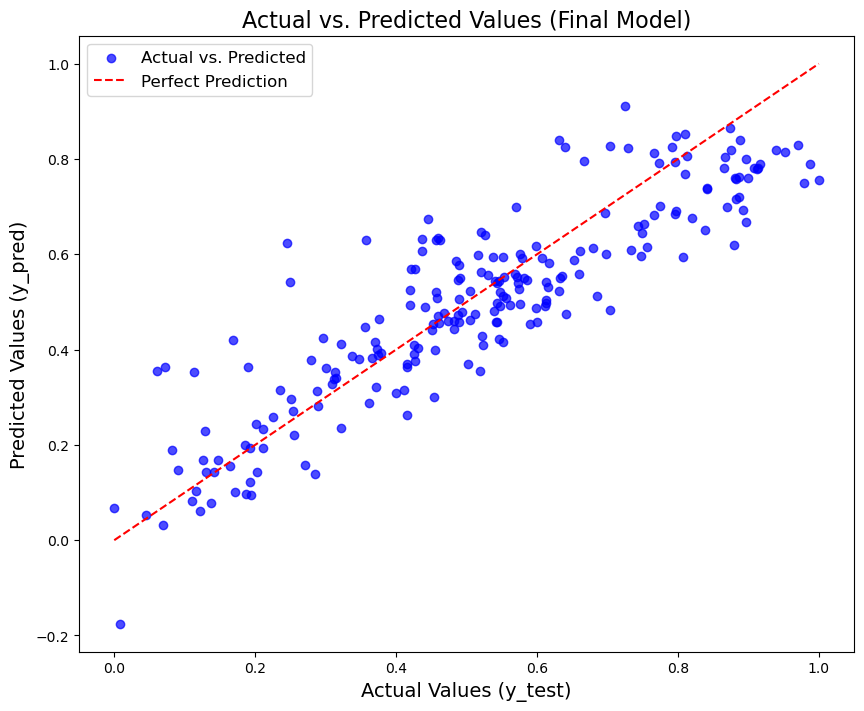

In [78]:
# Create a scatter plot of y_test vs. y_pred
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred_final_model, alpha=0.7, color='blue', label='Actual vs. Predicted')

# Add a diagonal line for reference (perfect prediction)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')

# Set plot labels and title
plt.xlabel('Actual Values (y_test)', fontsize=14)
plt.ylabel('Predicted Values (y_pred)', fontsize=14)
plt.title('Actual vs. Predicted Values (Final Model)', fontsize=16)

# Add a legend to the plot
plt.legend(fontsize=12)

# Show the plot
plt.show()

The top predictor variables that significantly influence bike bookings (cnt) are temperature (temp), year 2019 (yr_2019), and weather condition (weathersit_Light Rain). To achieve maximum bookings, businesses should prioritize these variables in their planning, marketing, and operations. By capitalizing on favorable temperatures, analyzing each year's performance, and addressing customer concerns during light rain, bike rental businesses can attract more customers and optimize their performance in the market.